# About
This notebook looks at tailedness of the lognormal distribution. 

The LogNormal can be both thin OR fat tailed! By definition a lognormal is the distribution of the log of the normal distribution. If the underlying normal has high standard deviation then the corresponding lognormal will be fattailed.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import lognorm

###  Plot Simple Lognormal
Do a basic lognormal plot before we try to vary the shape.

In [17]:
# Chose a shape parameter
shape = 1 # std of the underlying normal distribution

In [18]:
# Generate 100 Points
x = np.linspace(0, 4, 100)  # 100 equally spaced x locations
y = lognorm.pdf(x, s=shape) # 100 corresponding probability densities

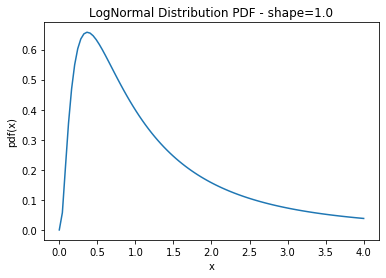

In [19]:
# Plot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel='x', ylabel='pdf(x)',
       title=f'LogNormal Distribution PDF - shape={float(shape)}')
#ax.grid()
plt.show()

# Vary the Shape
The shape parameter is the standard deviation of the normal distribution before it gets converted into a lognormal.

In [20]:
# Select some Shapes
shapes = list(np.logspace(np.log(0.1), np.log(2), num=7, base=np.e))
shapes = [round(shape,2) for shape in shapes] # Round to two decimals
shapes

[0.1, 0.16, 0.27, 0.45, 0.74, 1.21, 2.0]

In [21]:
# Generate points for the x-axis
x = np.linspace(0, 4, 100)

In [22]:
# FUNCTION
# Lets be explicit about how probability density is calculated
get_probability_density = lambda x, shape: lognorm.pdf(x, shape)

In [23]:
# Create the PDF curves
# Each sublist is a list of probability densities for a different shape s
curve_list = [get_probability_density(x, shape) for shape in shapes]

In [24]:
# Make a Table from the PDFs
df = pd.DataFrame(curve_list, columns=x, index=shapes)
df.index.name = 'shape'
df.columns.name='x'
df = df.T
df

shape,0.10,0.16,0.27,0.45,0.74,1.21,2.00
x,,,,,,,
0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
0.040404,2.555663e-222,2.829441e-86,7.811846e-30,1.994988e-10,0.001102,0.242421,1.362975
0.080808,1.857126e-136,6.424591e-53,2.576193e-18,1.794081e-06,0.020637,0.469939,1.119087
0.121212,6.632894e-96,3.479377e-37,6.635127e-13,1.227601e-04,0.076265,0.594476,0.943181
0.161616,1.838102e-71,1.031059e-27,1.166682e-09,1.504297e-03,0.160704,0.656139,0.814845
...,...,...,...,...,...,...,...
3.838384,5.386173e-40,2.929210e-16,1.571965e-06,2.651706e-03,0.026923,0.046307,0.041449
3.878788,1.296201e-40,1.668536e-16,1.281333e-06,2.447112e-03,0.025963,0.045385,0.040873
3.919192,3.131748e-41,9.519676e-17,1.045101e-06,2.258978e-03,0.025042,0.044486,0.040309


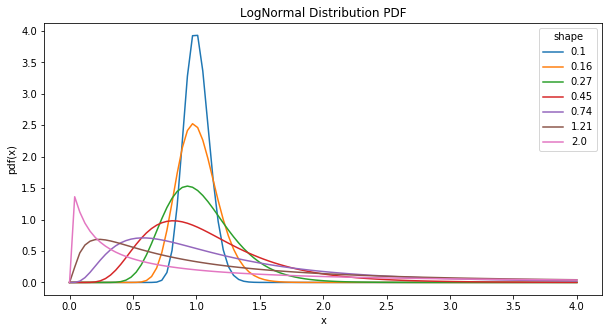

In [25]:
# Plot the PDF for each Shape
ax = df.plot(figsize=[10,5])
ax.set(xlabel='x', ylabel='pdf(x)',
       title=f'LogNormal Distribution PDF');

See how it looks normally distributed for small shape parameters. But then as the shape increases it loses symmetry and builds up a right tail.

# Conclusion
The lognormal can be Thin Tailed OR Fat Tailed!

When the lognormal's is based on a low variance gaussian it is thin tailed and bell shaped. As you increase the variance of the underlying gaussian the lognormal gets more and more skewed. For large scale parameter the lognormal has a very fat right tail.